In [5]:
#import required libraries
from sklearn.metrics import accuracy_score    # for calculating accuracy score
from sklearn.model_selection import train_test_split    # for splitting data into train and test
from sklearn.metrics import classification_report    # for printing classification report
import pickle    # for saving and loading model
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
bin_data = pd.read_csv('bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes = np.load('le1_classes.npy',allow_pickle=True)
le2_classes = np.load('le2_classes.npy',allow_pickle=True)

# **Linear Support Vector Machnine Classifier(Binary Classification)**


In [ ]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [8]:

X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [9]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
# using kernel as linear
lsvm = SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [ ]:
pkl_filename = "lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk")

In [ ]:


y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)



LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [ ]:
# classification report
report = classification_report(y_test, y_pred,target_names=le1_classes)
print(classification_report(y_test, y_pred,target_names=le1_classes))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [ ]:
with open('classification_report_lsvm.txt', 'w') as f:
    f.write(report)

# **Quadratic Support Vector Machine Classifier **

In [10]:
X2 = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y2 = multi_data['intrusion']

In [11]:
# splitting the dataset 75% for training and 25% testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.25, random_state=42)

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X2_train,y2_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [ ]:
pkl_filename = "qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [ ]:
y2_pred=qsvm.predict(X2_test) # predicting target attribute on testing dataset
ac=accuracy_score(y2_test, y2_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  92.86213246967677


In [ ]:

# classification report
report = classification_report(y2_test, y2_pred,target_names=le2_classes)
print(classification_report(y2_test, y2_pred,target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
with open('classification_report_qsvm.txt', 'w') as f:
    f.write(report)

# **Decision Tree Classifier (Binary Classification)**


In [ ]:
# Importing required libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating and training the Decision Tree model
dt_bin = DecisionTreeClassifier(random_state=42)
dt_bin.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Saving and loading the model if it doesn't already exist
pkl_filename_bin = "dt_binary.pkl"
if not path.isfile(pkl_filename_bin):
    with open(pkl_filename_bin, 'wb') as file:
        pickle.dump(dt_bin, file)
    print("Saved binary Decision Tree model to disk")

# Loading the binary model from disk
with open(pkl_filename_bin, 'rb') as file:
    dt_bin = pickle.load(file)
    print("Loaded binary Decision Tree model from disk")

Loaded binary Decision Tree model from disk


In [ ]:
# Predicting and calculating accuracy
y_pred = dt_bin.predict(X_test)
bin_accuracy = accuracy_score(y_test, y_pred) * 100
print("Decision Tree Binary Set - Accuracy is ", bin_accuracy)

Decision Tree Binary Set - Accuracy is  98.54892995491204


In [ ]:
# Printing classification report
report = classification_report(y_test, y_pred, target_names=le1_classes)
print(classification_report(y_test, y_pred, target_names=le1_classes))

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [ ]:
with open('classification_report_ldt.txt', 'w') as f:
    f.write(report)

# **Decision Tree Classifier (Multi-Class Classification)**

In [ ]:
# Creating and training the Decision Tree model
dt_multi = DecisionTreeClassifier(random_state=42)
dt_multi.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Saving and loading the model if it doesn't already exist
pkl_filename_multi = "dt_multi.pkl"
if not path.isfile(pkl_filename_multi):
    with open(pkl_filename_multi, 'wb') as file:
        pickle.dump(dt_multi, file)
    print("Saved multi-class Decision Tree model to disk")

# Loading the multi-class model from disk
with open(pkl_filename_multi, 'rb') as file:
    dt_multi = pickle.load(file)
    print("Loaded multi-class Decision Tree model from disk")


Loaded multi-class Decision Tree model from disk


In [ ]:
# Predicting and calculating accuracy
y2_multi_pred = dt_multi.predict(X2_test)
multi_accuracy = accuracy_score(y2_test, y2_multi_pred) * 100
print("Decision Tree Multi-Class Set - Accuracy is ", multi_accuracy)

Decision Tree Multi-Class Set - Accuracy is  98.29808852479837


In [ ]:
# Printing classification report
report = classification_report(y2_test, y2_multi_pred, target_names=le2_classes)
print(classification_report(y2_test, y2_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.97      0.97      2947
         R2L       0.83      0.87      0.85       274
         U2R       0.25      0.13      0.17        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.80      0.79      0.79     31494
weighted avg       0.98      0.98      0.98     31494



In [ ]:
with open('classification_report_mdt.txt', 'w') as f:
    f.write(report)

In [16]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Input, Attention, GlobalAveragePooling1D, Dropout,Permute, LayerNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer
from sklearn.metrics import accuracy_score, classification_report

# **LSTM Model for Binary Classification**


In [ ]:
X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
X_lstmb_train, X_lstmb_test, y_lstmb_train, y_lstmb_test = train_test_split(X_lstm, Y, test_size=0.25, random_state=42)

In [ ]:
# Building the LSTM model
lstm_bin = Sequential()
lstm_bin.add(LSTM(50, input_shape=(X_lstmb_train.shape[1], X_lstmb_train.shape[2]), return_sequences=True))
lstm_bin.add(LSTM(50))
lstm_bin.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Convert to float32
X_lstmb_train = X_lstmb_train.astype('float32')
y_lstmb_train = y_lstmb_train.astype('float32')


In [ ]:
# Training the model
lstm_bin.fit(X_lstmb_train, y_lstmb_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - accuracy: 0.9519 - loss: 0.1501 - val_accuracy: 0.9741 - val_loss: 0.0683
Epoch 2/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9780 - loss: 0.0640 - val_accuracy: 0.9728 - val_loss: 0.0725
Epoch 3/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9794 - loss: 0.0605 - val_accuracy: 0.9764 - val_loss: 0.0610
Epoch 4/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9792 - loss: 0.0608 - val_accuracy: 0.9780 - val_loss: 0.0617
Epoch 5/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9787 - loss: 0.0604 - val_accuracy: 0.9785 - val_loss: 0.0591
Epoch 6/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9800 - loss: 0.0573 - val_accuracy: 0.9783 - val_loss: 0.0579
Epoch 7/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9815 - loss: 0.0547 - val_accuracy: 0.9787 - val_loss: 0.0572
Epoch 8/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9814 - loss: 0

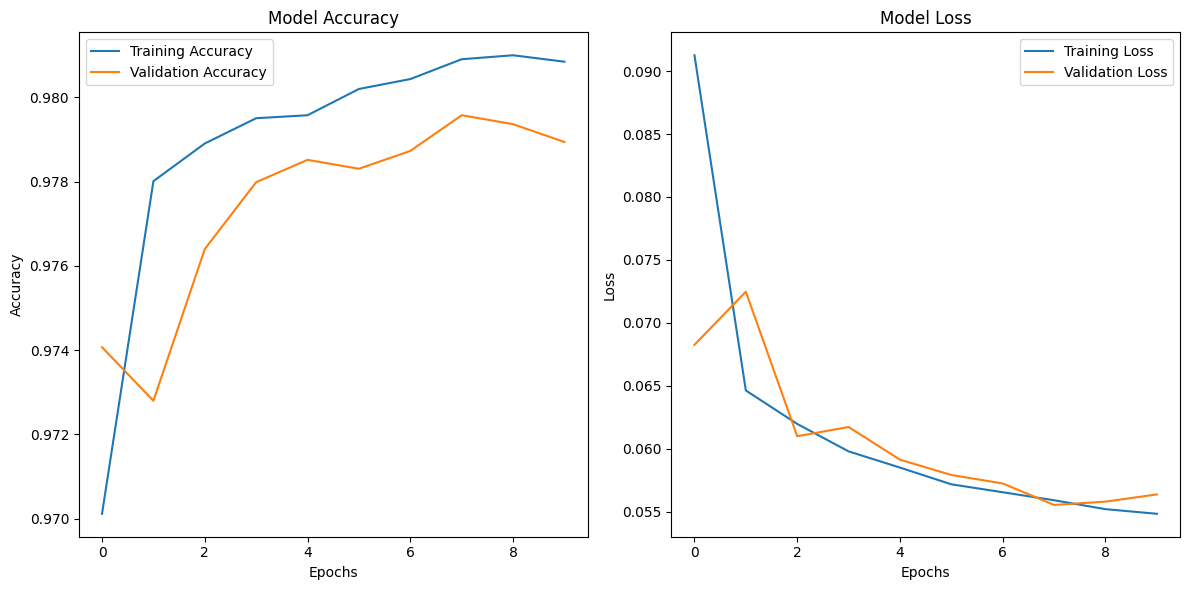

In [ ]:
history = lstm_bin.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

# Saving the model
lstm_bin.save("lstm_binary.h5")


In [ ]:
X_lstmb_test = X_lstmb_test.astype('float32').reshape((X_lstmb_test.shape[0], 1, 93))


In [ ]:
# Evaluating the model
y_bin_pred = (lstm_bin.predict(X_lstmb_test) > 0.5).astype("float32").flatten()
bin_accuracy = accuracy_score(y_lstmb_test, y_bin_pred) * 100
print("LSTM Binary Set - Accuracy is ", bin_accuracy)


985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Binary Set - Accuracy is  98.09170000635041


In [ ]:
# Printing classification report
report = classification_report(y_lstmb_test, y_bin_pred, target_names=le1_classes)
print(classification_report(y_lstmb_test, y_bin_pred, target_names=le1_classes))


              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     14720
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



In [ ]:
with open('classification_report_lstm.txt', 'w') as f:
    f.write(report)

# **LSTM Model for Multi-Class Classification**

In [ ]:
# Reshaping input data to be 3-dimensional [samples, time steps, features] for LSTM
X_lstmm = X2.reshape((X2.shape[0], 1, X2.shape[1]))


In [ ]:
# Splitting dataset into training (75%) and testing (25%) sets
X_lstmm_train, X_lstmm_test, y_lstmm_train, y_lstmm_test = train_test_split(X_lstmm, Y2, test_size=0.25, random_state=42)

In [ ]:
# Building the LSTM model
lstm_multi = Sequential()
lstm_multi.add(LSTM(50, input_shape=(X_lstmm_train.shape[1], X_lstmm_train.shape[2]), return_sequences=True))
lstm_multi.add(LSTM(50))
lstm_multi.add(Dense(len(le2_classes), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
lstm_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Convert to float32
X_lstmm_train = X_lstmm_train.astype('float32')
y_lstmm_train = y_lstmm_train.astype('float32')

In [ ]:
# Training the model
lstm_multi.fit(X_lstmm_train, y_lstmm_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9268 - loss: 0.3116 - val_accuracy: 0.9645 - val_loss: 0.0929
Epoch 2/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9681 - loss: 0.0899 - val_accuracy: 0.9696 - val_loss: 0.0812
Epoch 3/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9725 - loss: 0.0803 - val_accuracy: 0.9738 - val_loss: 0.0742
Epoch 4/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9749 - loss: 0.0751 - val_accuracy: 0.9743 - val_loss: 0.0743
Epoch 5/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9756 - loss: 0.0712 - val_accuracy: 0.9764 - val_loss: 0.0716
Epoch 6/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9767 - loss: 0.0684 - val_accuracy: 0.9748 - val_loss: 0.0702
Epoch 7/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9778 - loss: 0.0652 - val_accuracy: 0.9767 - val_loss: 0.0662
Epoch 8/10
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9770 - loss: 0

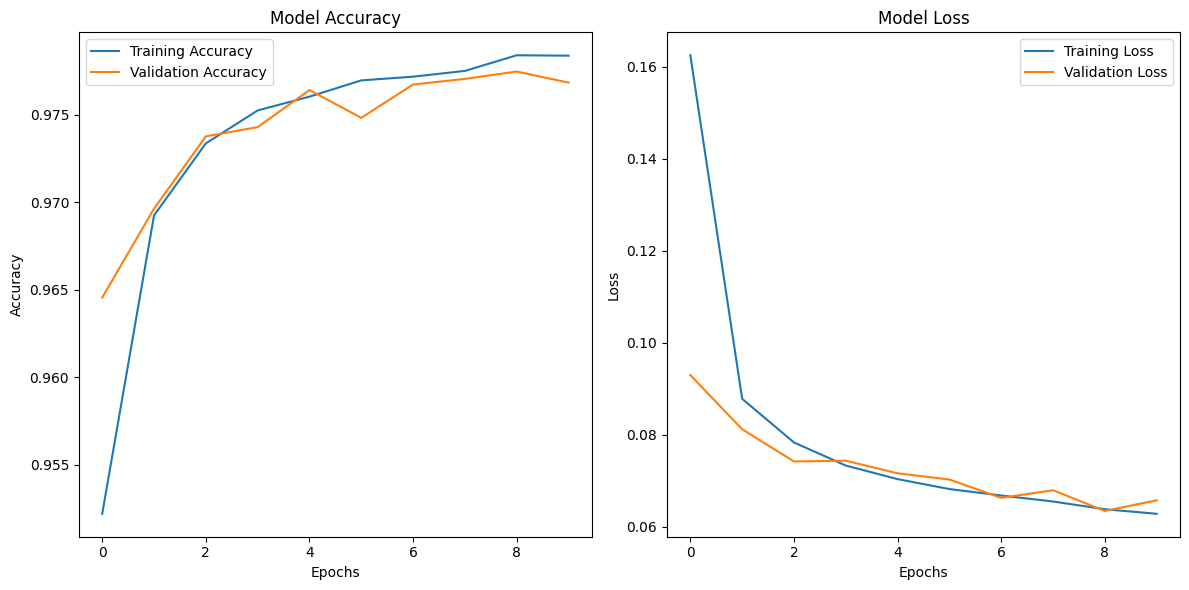

In [ ]:
history = lstm_multi.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Saving the model
lstm_multi.save("lstm_multi.h5")

In [ ]:
X_lstmm_test = X_lstmm_test.astype('float32').reshape((X_lstmb_test.shape[0], 1, 93))


In [ ]:
# Evaluating the model
y_multi_pred = lstm_multi.predict(X_lstmm_test).argmax(axis=1)
multi_accuracy = accuracy_score(y_lstmm_test, y_multi_pred) * 100
print("LSTM Multi-Class Set - Accuracy is ", multi_accuracy)

985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
LSTM Multi-Class Set - Accuracy is  97.83133295230839


In [ ]:
# Printing classification report
report = classification_report(y_lstmm_test, y_multi_pred, target_names=le2_classes)
print(classification_report(y_lstmm_test, y_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.99      0.98      0.99     11484
       Probe       0.96      0.93      0.95      2947
         R2L       0.81      0.76      0.78       274
         U2R       0.00      0.00      0.00        15
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.75      0.73      0.74     31494
weighted avg       0.98      0.98      0.98     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
with open('classification_report_lstmm.txt', 'w') as f:
    f.write(report)

# **BLSTM Model with Attention**


In [12]:
# Reshaping input data to be 3-dimensional [samples, time steps, features] for LSTM
X_blstm = X2.reshape((X2.shape[0], 1, X2.shape[1]))

In [22]:
# Splitting dataset into training (75%) and testing (25%) sets
X_blstm_train, X_blstm_test, y_blstm_train, y_blstm_test = train_test_split(X_blstm, Y2, test_size=0.25, random_state=42)

In [23]:
# Ensure the input data is in float32 format
X_blstm_train = np.array(X_blstm_train, dtype='float32')
y_blstm_train = np.array(y_blstm_train, dtype='int32')  # Ensure target labels are integers for classification

In [ ]:
print("X_blstm_train shape:", X_blstm_train.shape)
print("y_blstm_train shape:", y_blstm_train.shape)

X_blstm_train shape: (94479, 1, 93)
y_blstm_train shape: (94479,)


In [18]:
# Building the BiLSTM +  Attention model
bilstm_attention_model = Sequential()

In [26]:
# Define the model using the Functional API
inputs = Input(shape=(X_blstm_train.shape[1], X_blstm_train.shape[2]))

In [29]:
# Bidirectional LSTM layer
bilstm_out = Bidirectional(LSTM(50, return_sequences=True))(inputs)

In [31]:
from tensorflow.keras.layers import Attention

In [32]:
# Adding Multi-Head Attention layer
# Multi-Head Attention layer
attention_out = Attention()([bilstm_out, bilstm_out])
attention_out = LayerNormalization()(attention_out)

In [33]:
# Add a Dropout layer for regularization
attention_out = Dropout(0.2)(attention_out)

In [34]:
# Another Bidirectional LSTM layer
bilstm_out2 = Bidirectional(LSTM(50))(attention_out)

In [35]:
# Dense output layer for multi-class classification
outputs = Dense(len(le2_classes), activation='softmax')(bilstm_out2)

In [36]:
from tensorflow.keras.models import Model

In [37]:
# Creating the model
bilstm_attention_model = Model(inputs=inputs, outputs=outputs)

In [38]:
# Compiling the model
bilstm_attention_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Ensure the input data is in float32 format
X_blstm_train = np.array(X_blstm_train, dtype='float32')
y_blstm_train = np.array(y_blstm_train, dtype='int32')  # Ensure target labels are integers for classification


In [ ]:

# Before training, print the shapes to verify:
print("X_blstm_train shape:", X_blstm_train.shape)
print("y_blstm_train shape:", y_blstm_train.shape)

X_blstm_train shape: (94479, 1, 93)
y_blstm_train shape: (94479,)


In [68]:
# Training the model
bilstm_attention_model.fit(X_blstm_train, y_blstm_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.9796 - loss: 0.0624 - val_accuracy: 0.9790 - val_loss: 0.0570
Epoch 2/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9797 - loss: 0.0587 - val_accuracy: 0.9757 - val_loss: 0.0658
Epoch 3/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.9793 - loss: 0.0599 - val_accuracy: 0.9783 - val_loss: 0.0592
Epoch 4/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9810 - loss: 0.0570 - val_accuracy: 0.9790 - val_loss: 0.0569
Epoch 5/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9803 - loss: 0.0573 - val_accuracy: 0.9799 - val_loss: 0.0579
Epoch 6/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9805 - loss: 0.0569 - val_accuracy: 0.9800 - val_loss: 0.0565
Epoch 7/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9806 - loss: 0.0570 - val_accuracy: 0.9782 - val_loss: 0.0607
Epoch 8/100
2658/2658 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.

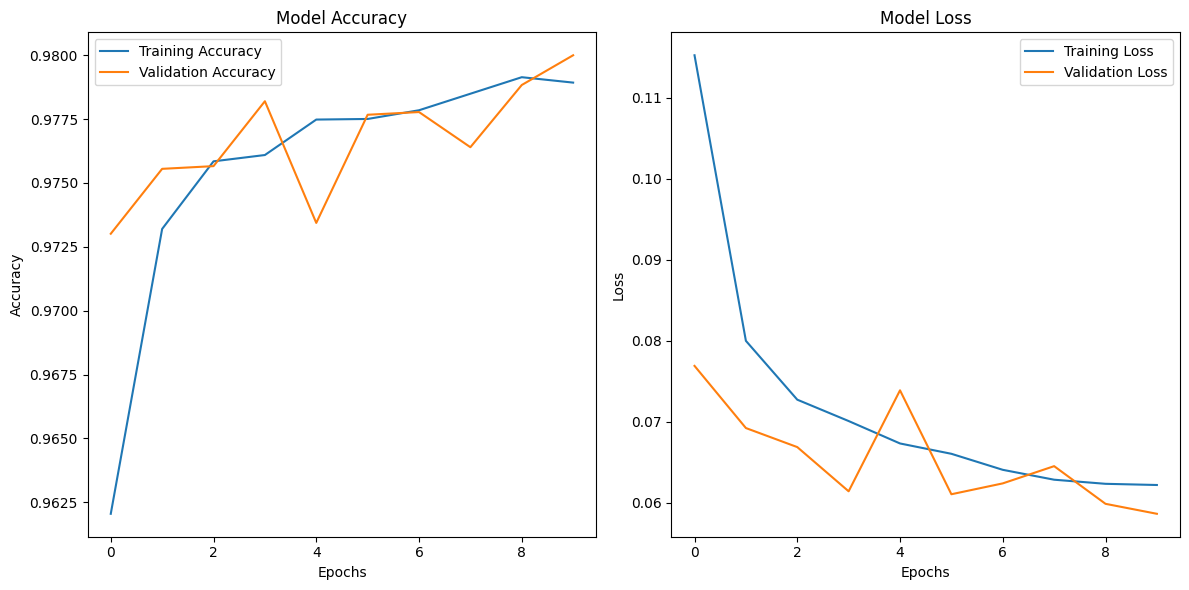

In [41]:
history = bilstm_attention_model.history  # Replace with your actual model history

# Extract metrics from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [58]:
from tensorflow.keras.models import model_from_json

# Load the model's JSON file
with open('bilstm_attention_model.json', 'r') as json_file:
    model_json = json_file.read()

# Replace 'batch_shape' with 'input_shape' in the model JSON string
model_json = model_json.replace('"batch_shape": [null, 1, 93]', '"input_shape": [1, 93]')

# Reload the model from the modified JSON
model = model_from_json(model_json)

# Optionally, load the weights if they're stored separately
# model.load_weights('model_weights.h5')

# Save the modified model as a new JSON file
with open('modified_bilstm_attention_model.json', 'w') as json_file:
    json_file.write(model.to_json())

# Optionally, save the entire model as a .h5 file
model.save('modified_bilstm_attention_model.h5')

print("Model and weights saved successfully!")



Model and weights saved successfully!


In [ ]:
# Save the model
bilstm_attention_model.save("bilstm_attention_model.h5")

In [ ]:
# Reshaping test data
X_blstm_test = X_blstm_test.astype('float32').reshape((X_blstm_test.shape[0], 1, X_blstm_test.shape[2]))

In [ ]:
# Evaluating the model
y_multi_pred = bilstm_attention_model.predict(X_blstm_test).argmax(axis=1)
multi_accuracy = accuracy_score(y_blstm_test, y_multi_pred) * 100
print("BiLSTM + Multi-Head Attention Multi-Class Set - Accuracy is ", multi_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
BiLSTM + Multi-Head Attention Multi-Class Set - Accuracy is  97.72972629707246


In [ ]:

# Printing classification report
report = classification_report(y_blstm_test, y_multi_pred, target_names=le2_classes)

print(classification_report(y_blstm_test, y_multi_pred, target_names=le2_classes))

              precision    recall  f1-score   support

         Dos       0.98      0.98      0.98     11484
       Probe       0.96      0.92      0.94      2947
         R2L       0.83      0.81      0.82       274
         U2R       0.00      0.00      0.00        15
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.75      0.74      0.74     31494
weighted avg       0.98      0.98      0.98     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
with open('classification_report_blstm.txt', 'w') as f:
    f.write(report)

In [ ]:
f.close()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9794
Precision: 0.9790
Recall: 0.9794
F1 Score: 0.9792


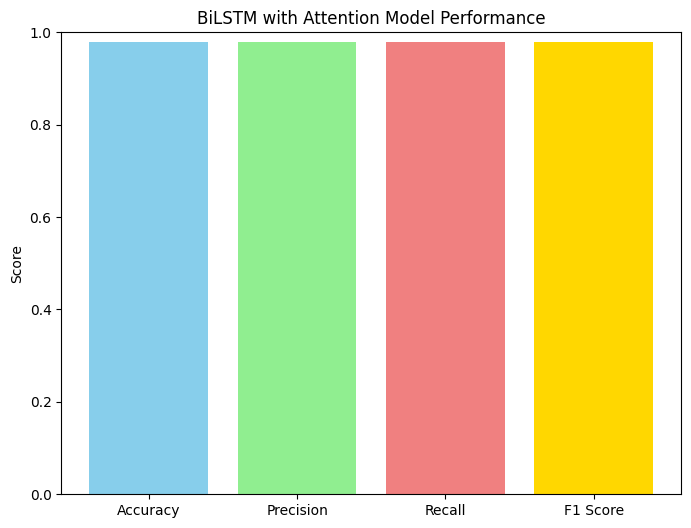

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_blstm_test and y_multi_pred are your true and predicted labels respectively
# Calculate metrics
accuracy = accuracy_score(y_blstm_test, y_multi_pred)
precision = precision_score(y_blstm_test, y_multi_pred, average='weighted')
recall = recall_score(y_blstm_test, y_multi_pred, average='weighted')
f1 = f1_score(y_blstm_test, y_multi_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create bar plot for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('BiLSTM with Attention Model Performance')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for score range
plt.show()

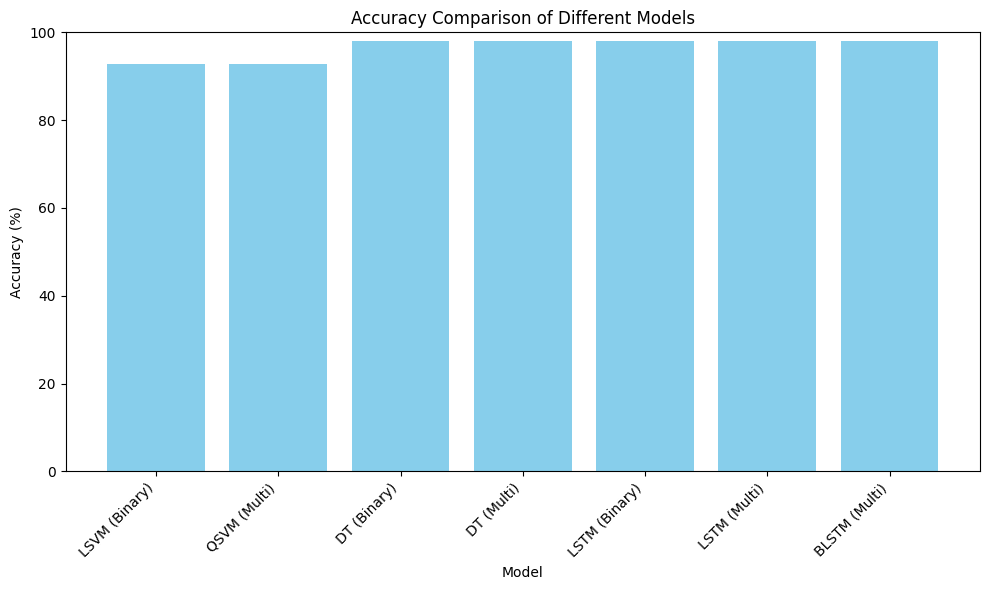

In [ ]:

# Accuracy scores for each model
models = ['LSVM (Binary)', 'QSVM (Multi)', 'DT (Binary)', 'DT (Multi)', 'LSTM (Binary)', 'LSTM (Multi)', 'BLSTM (Multi)']
accuracies = [ac, ac, bin_accuracy, multi_accuracy, bin_accuracy, multi_accuracy, multi_accuracy]

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim([0, 100])  # Set y-axis limits to 0-100 for accuracy percentage

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


#  **Predicting Sample**

In [67]:
# Load your sample CSV data
sample_data = pd.read_csv('sample_input.csv')

# Preprocess the data (match preprocessing done during training)
X_sample = sample_data.values  # Convert to numpy array
X_sample = X_sample.reshape((X_sample.shape[0], 1, X_sample.shape[1]))  # Reshape to (samples, time_steps, features)
X_sample = np.array(X_sample, dtype='float32')

# Load the saved model
model = load_model('modified_bilstm_attention_model.h5')

# Make predictions
predictions = model.predict(X_sample)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# If you have the label encoder (le2_classes), convert class indices back to labels
# predicted_labels = le2_classes.inverse_transform(predicted_classes)

# Print the predicted class indices or labels
print("Predicted classes (indices):", predicted_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
Predicted classes (indices): [0 0 4 1 4 3 2 0 4 1]


In [70]:
import numpy as np

# Load the label classes from the le2_classes.npy file
le2_classes = np.load('le2_classes.npy', allow_pickle=True)

# Predict the classes
predictions = model.predict(X_sample)

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Convert class indices to class names
predicted_class_names = le2_classes[predicted_class_indices]

print("Predicted class names:")
for i in predicted_class_names:
  print(i+"\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class names:
Dos

Dos

normal

Probe

normal

U2R

R2L

Dos

normal

Probe

